In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

from sklearn import linear_model

# Open data

In [5]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/panNeuronalGCaMP62/FreeBehavior/100234/100234/100234ss2cregcdFF20sMpsfkfint350Smith0_4_60TS.mat


In [6]:
Ua=sio.loadmat(filename) #import scipy.io as sio
DT=Ua['TSo'] # DT are the component's time series
DT.shape #(time steps, number of components)

(12258, 350)

In [7]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/panNeuronalGCaMP62/FreeBehavior/100234/100234/100234ss2cregcdFF20sMpsfkfint350Smith0_4_60IC.nii


In [8]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape 
S

(168, 111, 10, 350)

Z-score

In [9]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [10]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [11]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [11]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/panNeuronalGCaMP62/FreeBehavior/100234/100234/100234Xk.mat


In [12]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']
print(Xk.shape)

(12258, 3)


In [13]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
print(nimt.get_data().shape)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/panNeuronalGCaMP62/FreeBehavior/100234/100234/AVG_100234ss2cregcpsf.nii
(168, 111, 11, 1)


(168, 111, 11)

# Fit turns

In [14]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [15]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    print("Int100 is ", Int100)
    Percs=np.percentile(range(S[2]),Int100)  #Percs = min(range()) + (max(range()) - min(range())) * Int100 / 100
    print("S[2] is ", S[2])
    print("Percs is ", Percs)
    Indices=np.split(range(S[2]),Percs)
    print("Indices is ", Indices)
    D1=np.zeros([S[0],S[1],Nstack])
    #print("D1 is ", D1)
    Dmean=np.squeeze(data[:,:,range(Nstack),2]) #np.squeeze: Remove single-dimensional entries from the shape of an array.
    print("Dmean.shape is ", Dmean.shape)
    for i in range(Nstack):
        Dmean[:,:,i]=np.mean(Dtemp[:,:,Indices[i]],2) #Vmean
        #print("Indices[i] is ", Indices[i])
        
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]]) #defined but not used?
    Dmean=data[:,:,range(S[2])]
    Dmean=np.squeeze(Dtemp[:,:,:])
    

('Int100 is ', [20, 40, 60, 80, 100])
('S[2] is ', 10)
('Percs is ', array([ 1.8,  3.6,  5.4,  7.2,  9. ]))
('Indices is ', [array([0]), array([1, 2]), array([3, 4]), array([5, 6]), array([7, 8]), array([9])])
('Dmean.shape is ', (168, 111, 5))


/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


In [16]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan

(168, 111, 5)


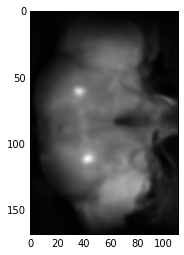

In [21]:
print(Dmean.shape)
plt.imshow(Dmean[:,:,4],cmap=plt.cm.gray)#see if we could plot the template map

In [22]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [23]:
# Important thing for fish to look at 

In [24]:
Sxk=Xk.shape

In [25]:
Sxk

(12258, 3)

In [26]:
#del X

In [27]:
X=np.zeros((Sxk[0],1))
print("X.shape is ", X.shape)

('X.shape is ', (12258, 1))


In [28]:
#X[:,0]=(Xk[:,0]-np.mean(Xk[:,0]))/np.std(Xk[:,0]) #standard normal distribution
#X[:,1]=(Xk[:,1]-np.mean(Xk[:,1]))/np.std(Xk[:,1])
# Go straight
X[:,0]=(Xk[:,2]-np.mean(Xk[:,2]))/np.std(Xk[:,2])#doesn't make sense to 
print("X.shape is ", X.shape)
#X[:,2]=(Xk[:,3]-np.mean(Xk[:,3]))/np.std(Xk[:,3])
#X[:,3]=(Xk[:,4]-np.mean(Xk[:,4]))/np.std(Xk[:,4])
#X[:,4]=(Xk[:,6]-np.mean(Xk[:,6]))/np.std(Xk[:,6])
#X[:,5]=(Xk[:,7]-np.mean(Xk[:,7]))/np.std(Xk[:,7])

('X.shape is ', (12258, 1))


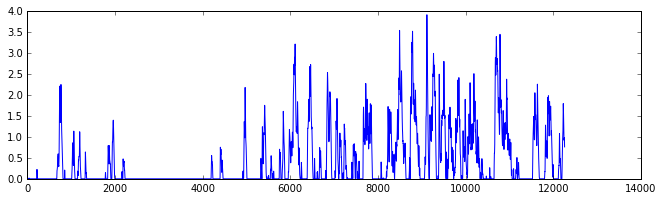

In [29]:
pylab.rcParams['figure.figsize'] = (11, 3)
T=X
T[X<0]=0
#plt.plot(np.diff(T[:,0])*10)
#plt.plot(T[:,0])
#plt.plot(Xk[:,0]-Xk[:,1])
#plt.plot(T[:,1]-T[:,0])
#plt.plot(Xk[:,1])
#plt.plot(X[:,1]-X[:,0])
plt.plot(X[:,0])
#plt.plot(X[:,3])
#plt.plot(X[:,4])
#plt.plot(X[:,5])
#zero_crossings = np.where(np.diff(np.sign(T[:,1]-T[:,0])))[0]
#print(zero_crossings.shape)

In [30]:
DT.shape

(12258, 350)

In [31]:
X.shape

(12258, 1)

# Plot all components for turning left, right, walking, and grooming

In [32]:
algorithm = linear_model.LinearRegression()

In [42]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((1,S[3])) #used to be np.zeros((2,S[3])) when taking care of L-R WITHOUT straight

In [43]:
#Also to look at carefully

In [44]:
Sx = X.shape

In [45]:
for j in range(S[3]):
    model = algorithm.fit(X, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(X,DT[:,j])

In [46]:
RsqUni=np.zeros((6,S[3]))
BetaUni=np.zeros((6,S[3]))

In [47]:
for k in range(1):
    for j in range(S[3]):
        model = algorithm.fit(np.reshape(X[:,k],(Sx[0],1)), DT[:,j])
        BetaUni[k,j] = model.coef_
        RsqUni[k,j] = model.score(np.reshape(X[:,k],(Sx[0],1)),DT[:,j])
    

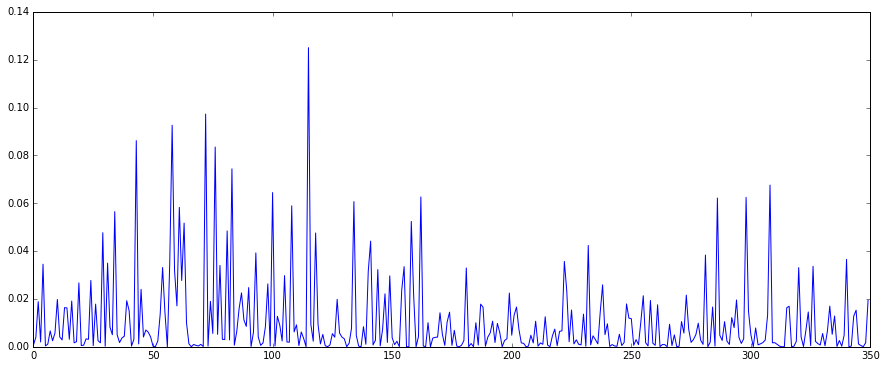

In [48]:
plt.plot(RsqUni[0,:])

In [49]:
import random

5
[ 0.03453991]
35
[ 0.05652443]
44
[ 0.08620208]
5
35
44


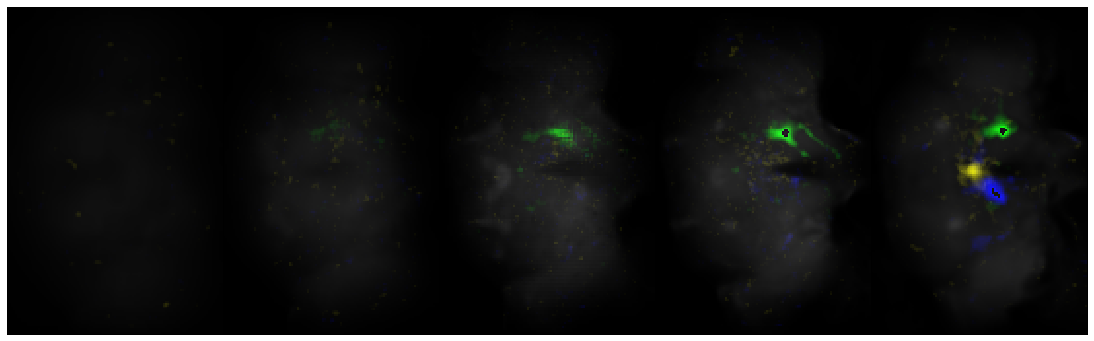

In [54]:
#del Final_map
#del Fmaps

if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape


C=np.zeros((S[3],3))
i=1
l=0
Betas2=Betas
for j in range(S[3]):  
    if Betas2[0,j]>0.8*np.max(Betas2[0,:]):
    #if 1>0.1:
        C[j,:]=C1[i%6][:]
        #C[j,2]=1
        #C[j,1]=1-i/2
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.5*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas2[0,j]=0
        #print(Indexo[j])
        i=i+1
        l=l+1
        print(j+1)
        print(Rsq[:,j])
        #if l==2:
         #   break


C=np.zeros((S[3],3))
i=1
l=0
Betas2=Betas
for j in range(S[3]):  
    if Betas2[0,j]>0.8*np.max(Betas2[0,:]):
    #if 1>0.1:
        C[j,:]=C1[i%6][:]
        #C[j,0]=1#color change here
        #C[j,1]=i/2
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.5*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas[0,j]=0
        #print(Indexo[j])
        i=i+1
        l=l+1
        print(j+1)
        #if l==2:
            #break
 
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)#might be color 

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/50
    #Df=Df/(np.max(np.max(np.max(Df),3)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)